# In this notebook we visualize effects of different parameters in creating flat maps

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io as format_io

# sns.set_theme()

# Importing scores from simulations

In [2]:
def _load_data(h5_dirs,scd_stats,model):
    dataframes = []
    for h5_file in glob.glob(h5_dirs):
        dataframes.append(akita_utils.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))
    new_dataframe = pd.concat(dataframes)
    for stat in scd_stats:
        new_dataframe[f"mean_{stat}_score"] = (new_dataframe[f"{stat}_h1_m{model}_t0"]+new_dataframe[f"{stat}_h1_m{model}_t1"]+new_dataframe[f"{stat}_h1_m{model}_t2"]+new_dataframe[f"{stat}_h1_m{model}_t3"]+new_dataframe[f"{stat}_h1_m{model}_t4"]+new_dataframe[f"{stat}_h1_m{model}_t5"])/6
    new_dataframe.reset_index(drop=True, inplace=True)
    return new_dataframe

scd_stats = ["SCD","MPS","CS"]

h5_dirs = f"/home1/kamulege/akita_utils/bin/background_seq_experiments/data/pure_shuffled_seqs_scores/*.h5" 
dfs = _load_data(h5_dirs,scd_stats,0)
dfs.head()


# dfs = []
# for model in range(7):
#     h5_dirs = f"/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores_model{model}/*/*.h5" 
#     dfs += [_load_data(h5_dirs,scd_stats,model)]

# df_0,df_1,df_2,df_3,df_4,df_5,df_6 = dfs
# df_4.head()
# dfs = df_0

,CS_h1_m0_t0,CS_h1_m0_t1,CS_h1_m0_t2,CS_h1_m0_t3,CS_h1_m0_t4,CS_h1_m0_t5,GC_content,MPS_h1_m0_t0,MPS_h1_m0_t1,MPS_h1_m0_t2,...,SCD_h1_m0_t4,SCD_h1_m0_t5,ctcf_selection_threshold,locus_specification,mutation_method,out_folder,shuffle_parameter,mean_SCD_score,mean_MPS_score,mean_CS_score
0,84.12500,50.75000,-11.437500,1.095703,-37.062500,2.205078,0.386836,0.228760,0.383301,0.658203,...,58.71875,64.4375,4,"chr2,80418816,81729536",permute_whole_seq,data,2,75.6875,0.456299,14.945312
1,44.68750,37.03125,-3.806641,10.335938,140.375000,19.687500,0.386836,0.513184,0.739258,0.664551,...,35.93750,65.1250,4,"chr2,80418816,81729536",randomise_whole_seq,data,2,113.7500,0.578613,41.375000
2,69.25000,71.50000,87.875000,81.250000,153.000000,181.000000,0.386836,0.687988,0.611328,2.921875,...,593.00000,654.0000,4,"chr2,80418816,81729536",mask_motif,data,2,697.5000,1.996094,107.312500
3,49.78125,41.75000,-4.500000,4.480469,-20.171875,5.773438,0.386836,0.383789,0.468506,0.734375,...,59.71875,68.9375,4,"chr2,80418816,81729536",permute_motif,data,2,88.7500,0.567871,12.843750
4,42.28125,40.37500,-1.410156,7.500000,-17.656250,10.562500,0.386836,0.421387,0.517578,0.769043,...,55.43750,77.5625,4,"chr2,80418816,81729536",randomise_motif,data,2,101.0000,0.607422,13.593750


# General scores distribution

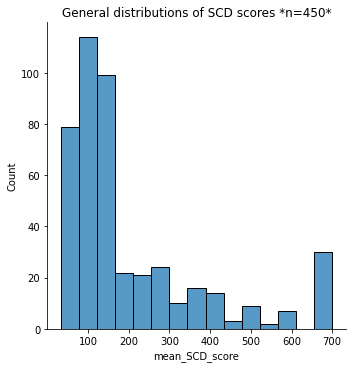

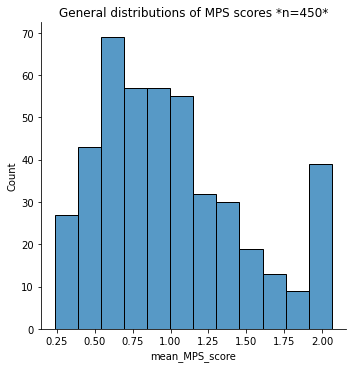

In [3]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_MPS_score")
plt.title(f"General distributions of MPS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

# sns.displot(dfs, x="mean_CS_score")
# plt.title(f"General distributions of CS scores *n={dfs.shape[0]}*")
# plt.show()
# plt.close()

# shuffle parameter effect exploration

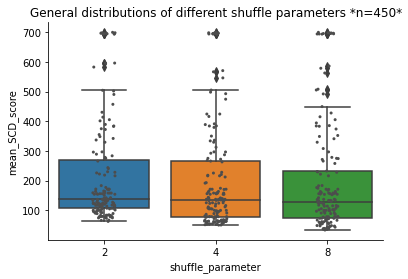

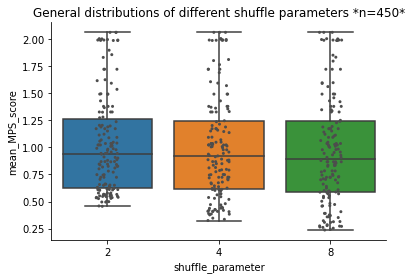

In [4]:
for map_score in ["mean_SCD_score","mean_MPS_score"]: #,"mean_CS_score"
    sns.color_palette("tab10")
    # sns.kdeplot(data=dfs, x=map_score, hue="shuffle_parameter", bw_adjust=.001, fill=True)
    # plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    # plt.xlim([0,100])
    # sns.despine(top = True, right = True)
    # plt.show()
    sns.boxplot(data=dfs, x='shuffle_parameter', y=map_score)
    sns.stripplot(x="shuffle_parameter", y=map_score, data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
#     for score in [2,4,8]:
#         df_dummy_parameter = dfs.loc[dfs["shuffle_parameter"]==score]
#         plt.figure(figsize=(10,5)) # ,dpi=200
#         ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y=map_score)
#         ax.tick_params(axis='x', labelrotation=45)
#         sns.stripplot(x="mutation_method", y=map_score, data=df_dummy_parameter, size=3, color=".3", linewidth=0)
#         plt.title(f"Disecting shuffling by {score} basepairs *n={df_dummy_parameter.shape[0]}*")
#         sns.despine(top = True, right = True)
        
#         plt.show()
#         plt.close()

# map threshold effect exploration

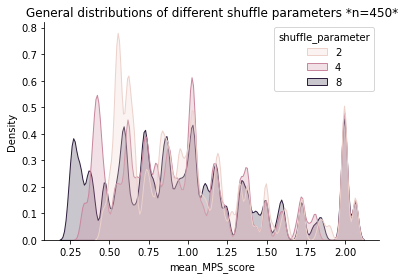

In [5]:
for score in ["mean_MPS_score"]: #,"mean_CS_score" "mean_SCD_score",
    sns.kdeplot(data=dfs, x= score, bw_adjust=.1, fill=True, hue="shuffle_parameter") # 
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

    # plt.figure(figsize=(12,5))
    # ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    # ax.tick_params(axis='x', labelrotation=45)
    # sns.stripplot(x="mutation_method", y=score, data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    # plt.title(f"Disecting {score} as map score threshold *n={df_dummy_parameter.shape[0]}*")
    # sns.despine(top = True, right = True)
    # plt.show()
    # plt.close()

# ctcf selection threshold effect exploration

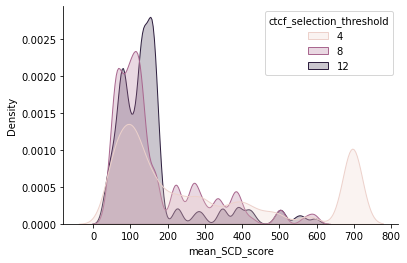

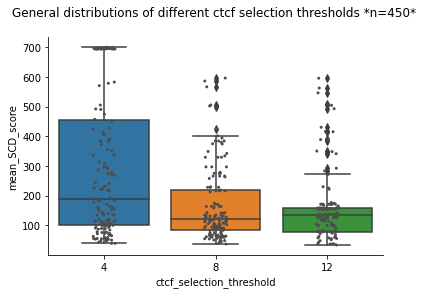

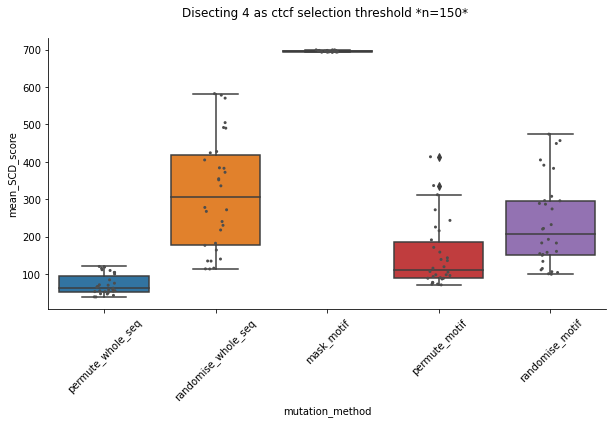

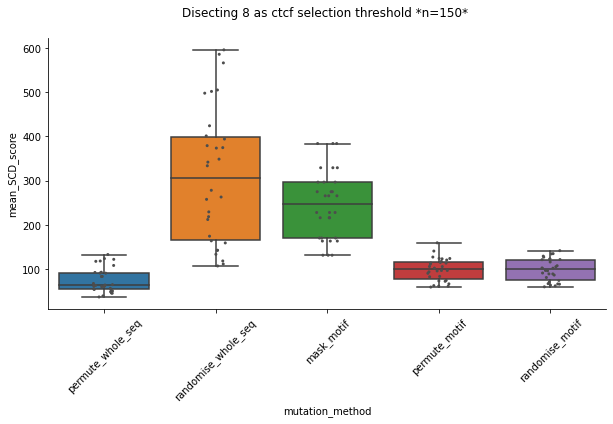

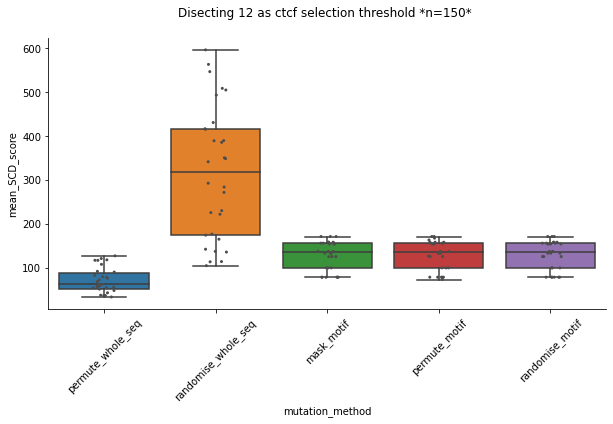

In [6]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_selection_threshold", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=dfs, x='ctcf_selection_threshold', y="mean_SCD_score")
sns.stripplot(x="ctcf_selection_threshold", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different ctcf selection thresholds *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [4,8,12]:
    df_dummy_parameter = dfs.loc[dfs["ctcf_selection_threshold"]==score]
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} as ctcf selection threshold *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# mutation method effect exploration

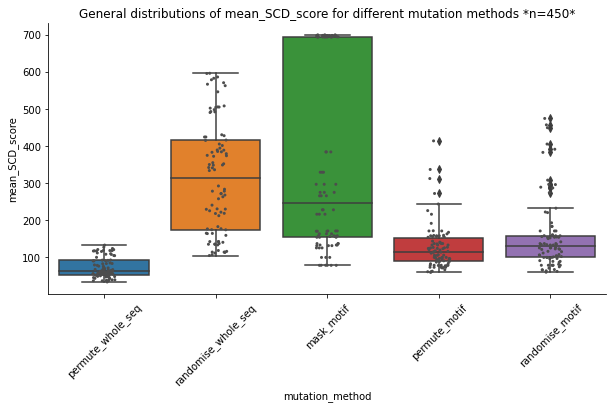

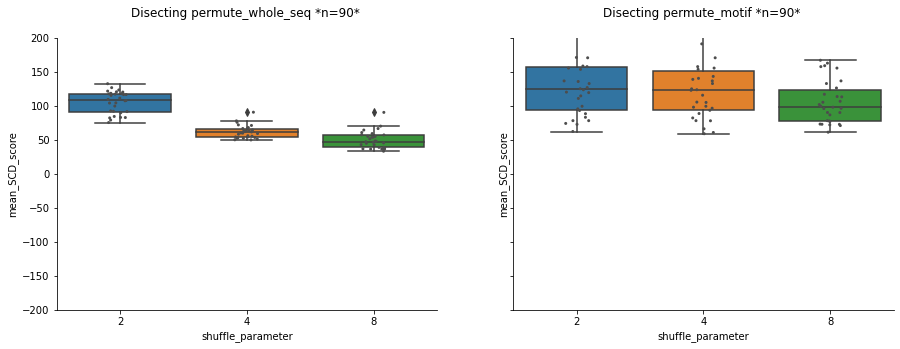

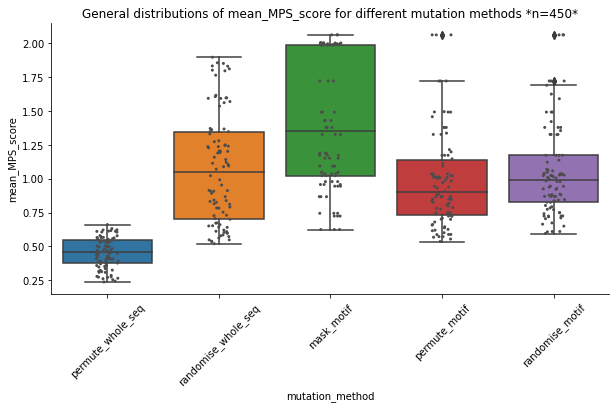

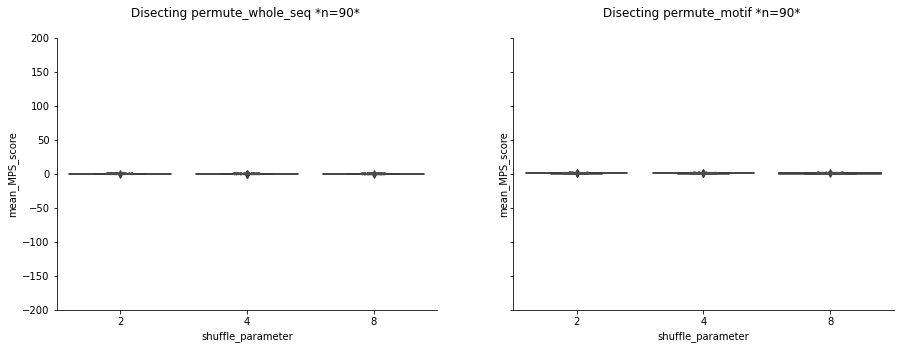

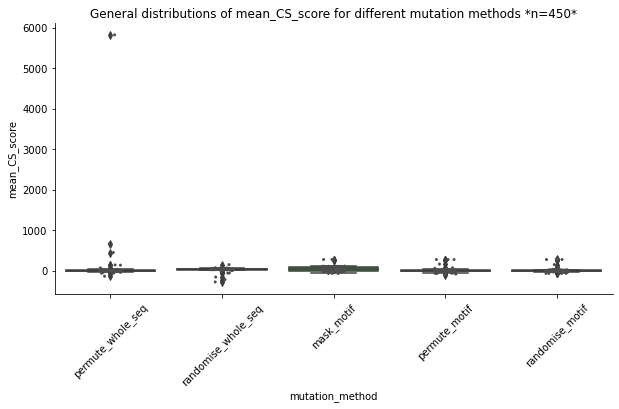

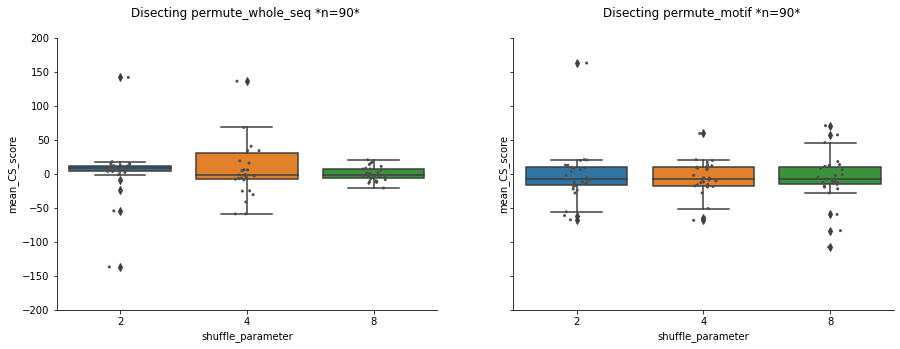

In [10]:
# sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
# plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}* \n")
# sns.despine(top = True, right = True)
# plt.show()

for stat in ["mean_SCD_score","mean_MPS_score","mean_CS_score"]: # 
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=dfs, x='mutation_method', y=stat)
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y=stat, data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of {stat} for different mutation methods *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

    fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
    for score_num,score in enumerate(['permute_whole_seq','permute_motif']): # ,'mask_motif','randomise_motif','randomise_whole_seq','mask_motif'
        df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
        sns.boxplot(ax=axes[score_num], data=df_dummy_parameter, x='shuffle_parameter', y=stat)
        sns.stripplot(ax=axes[score_num], x="shuffle_parameter", y=stat, data=df_dummy_parameter, size=3, color=".3", linewidth=0)
        ax=axes[score_num].set_title(f"Disecting {score} *n={df_dummy_parameter.shape[0]}* \n")
        ax=axes[score_num].set_ylim(-200, 200)
        sns.despine(top = True, right = True)
    plt.show()
        # plt.close()

# GC content effect exploration

In [8]:
# for score in ["mean_SCD_score","mean_MPS_score"]: # ,"mean_CS_score"
#     sns.jointplot(data=dfs, y=score, x = "GC_content", hue="shuffle_parameter") #

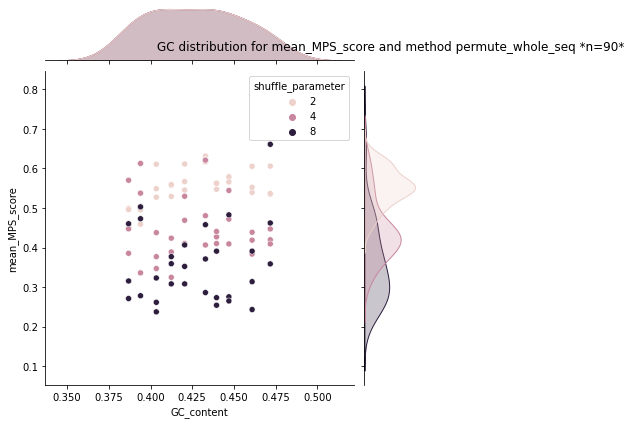

In [9]:
for method in ['permute_whole_seq']: #,'permute_motif''randomise_whole_seq','mask_motif',,'randomise_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==method]
    for score in ["mean_MPS_score"]: #,"mean_SCD_score" ,"mean_CS_score"
        sns.jointplot(data=df_dummy_parameter, y=score, x = "GC_content", hue="shuffle_parameter", color=".3")
        plt.title(f"GC distribution for {score} and method {method} *n={df_dummy_parameter.shape[0]}*\n")